## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [4]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

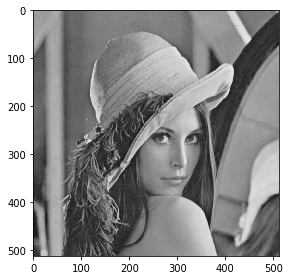

In [3]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
io.imshow(lena_im)

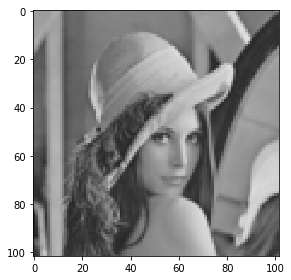

In [5]:
from scipy import misc
lena_2= misc.imresize(lena_im, 20, interp='bilinear', mode= None)
io.imshow(lena_2)

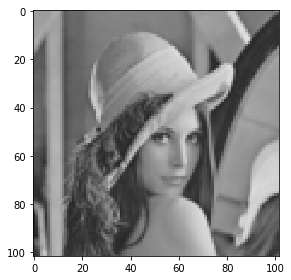

In [6]:
from scipy import misc
lena_3= misc.imresize(lena_im, 20, interp='nearest', mode= None)
io.imshow(lena_2)

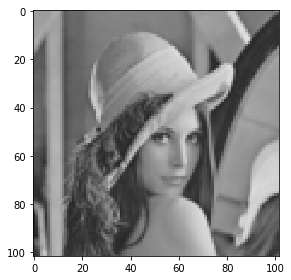

In [7]:
from scipy import misc
lena_4= misc.imresize(lena_im, 20, interp='bicubic', mode= None)
io.imshow(lena_2)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


C:\Users\natal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


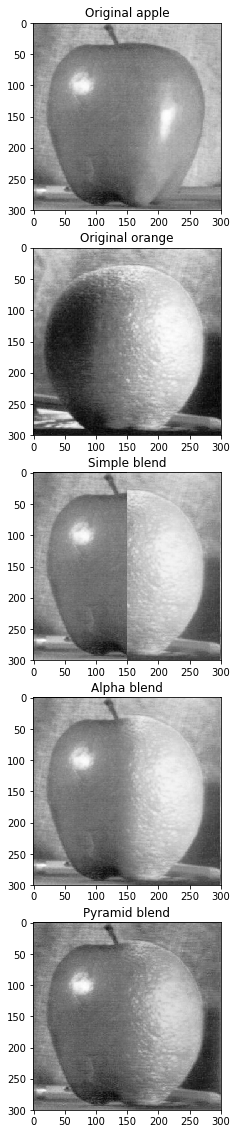

In [147]:
img_path = './images/'
img_apple = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_apple), as_grey=True)

img_path = './images/'
img_orange = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_orange), as_grey=True)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))
axes = axes.ravel()
axes[0].imshow(apple_im, cmap = cm.Greys_r)
axes[0].set_title('Original apple')
axes[1].imshow(orange_im, cmap = cm.Greys_r)
axes[1].set_title('Original orange')


def simple_blend (image1, image2):
    if(image1.shape != image2.shape):
        image1 = misc.imresize(image1,image2.shape, 'nearest')        
    blended = image1 
    r,c= image1.shape
    middle = int(np.ceil(c/2))
    blended [:, middle:c-1] = image2[:, middle:c-1] 
    return blended
blended2 = simple_blend(img_as_float(apple_im), img_as_float(orange_im))
axes[2].imshow(blended2, cmap = cm.Greys_r)
axes[2].set_title('Simple blend')

def alpha_blend(image1, image2):
    if(image1.shape != image2.shape):
        image1= misc.imresize(image1, np.shape(image2), 'nearest')   
    blended= image1
    r, c= image1.shape  
    mid= int(np.ceil(c/2))
    win= 20
    x1= int(mid - win)
    x2= int(mid + win)
    x= np.arange(x1,x2)
    alpha_mask = (x-x2) /(x1-x2)  
    blended [:, x1:x2]  = alpha_mask * image1[:, x1:x2] + (1-alpha_mask) * image2[:, x1:x2]    
    blended [:,x2:c-1] = image2[:,x2:c-1]       
    return blended
orange_im= io.imread('images/orange.jpeg', as_grey = True)
apple_im2= io.imread('images/apple.jpeg', as_grey = True)
blended2= alpha_blend(img_as_float(apple_im2), img_as_float(orange_im))
axes[3].imshow(blended2, cmap= cm.Greys_r)
axes[3].set_title('Alpha blend')

def pyramid_blend(image1, image2):
    mask= np.zeros(image1.shape)
    win= 20
    r, c =mask.shape
    mask[:,1:c//2 - win]= 1
    x1 =int(c//2 - win)
    x2 =int(c//2 + win)
    x=np.arange(x1,x2)
    mask [:, x1 : x2 ]= (x - x2)/( x1 - x2)   
    image1_lap =list( transform.pyramid_laplacian(image1)) 
    image2_lap =list(transform.pyramid_laplacian(image2))
    blended = []
    for i in range(len(image1_lap)):
        temp1 =image1_lap[i] * transform.resize(mask, image1_lap[i].shape)
        temp2 =image2_lap[i] * (1 - transform.resize(mask,image1_lap[i].shape))
        blended.append( temp1 + temp2 )
    restored =blended[len(blended)-1]
    for i in range(len(blended)-1, 0, -1):
        restored = transform.resize(restored, blended[i-1].shape) + blended[i-1]        
    return restored
orange_im =io.imread('images/orange.jpeg', as_grey= True)
apple_im2 =io.imread('images/apple.jpeg', as_grey= True)
blended2 =pyramid_blend(img_as_float(apple_im2), img_as_float(orange_im))
axes[4].imshow(blended2, cmap= cm.Greys_r)
axes[4].set_title('Pyramid blend')